In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import json
import warnings
import re
warnings.filterwarnings('ignore')

In [51]:
normalization=True
folder = "uniform_eq_results"
courses = ['analysenumerique_001', 'analysenumerique_002', 'villesafricaines_001', 'villesafricaines_002',
          'geomatique_003']

In [52]:
feature_names= []
feature_types = ['akpinar_et_al', 'boroujeni_et_al', 
                 'chen_cui', 'he_et_al', 'lalle_conati','lemay_doleck', 
                 'marras_et_al', 'mbouzao_et_al', 'mubarak_et_al', 'wan_et_al']

for course in courses:
    filepath = 'selected_features/' + course + '_after.json'
    with open(filepath, 'r') as f:
        data = json.load(f)
        for feature_type in feature_types:
            feature_type_name = data
    feature_type_name = pd.read_csv(filepath,header=None)
    feature_type_name = feature_type_name.values.reshape(-1)
    feature_names.append(feature_type_name)
    print(feature_type_name.shape)
    
feature_names = np.concatenate(feature_names)
feature_names


(44,)
(66,)
(61,)
(65,)
(66,)


array(['{"akpinar_et_al": ["total_clicks"', ' "number_sessions"',
       ' "time_in__video_sum"', ' "time_in__problem_sum"',
       ' "problem.check-problem.check-video.load"',
       ' "problem.check-problem.check-problem.check"]',
       ' "boroujeni_et_al": ["regularity_peak_dayhour"',
       ' "regularity_periodicity_m1"', ' "delay_lecture"]',
       ' "chen_cui": ["time_sessions_sum"', ' "time_sessions_mean"',
       ' "time_between_sessions_std"', ' "time_sessions_std"',
       ' "total_clicks_weekday"', ' "total_clicks_weekend"',
       ' "ratio_clicks_weekend_day"', ' "total_clicks_video"',
       ' "total_clicks_problem"]', ' "he_et_al": ["attendance_rate"]',
       ' "lalle_conati": ["total_clicks_Video.Load"',
       ' "weekly_prop_watched_mean"', ' "weekly_prop_replayed_mean"',
       ' "total_clicks_Video"', ' "frequency_action_Video.Load"]',
       ' "lemay_doleck": ["speed_playback__mean"',
       ' "speed_playback__std"', ' "count_unique_elements_video"]',
       ' "mar

# Normalize results

In [53]:
# create normalized LIME results
lime_normalized = []
for course in courses:
    extract_file = folder + "/LIME/" + course + "/dataframes/all_important_features.csv"
    df = pd.read_csv(extract_file, header=0)
    df.drop(['exp number', 'real value'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp number']
    normalized_df['real value'] = df['real value']
    normalized_df.to_csv(folder + '/metrics_use/' + 'normalized_LIME_' + course +".csv")
    lime_normalized.append((course,normalized_df))

In [55]:
# normalized Permutation SHAP results
# perm_shap_normalized = []
# for course in courses:
#     extract_file = folder + "/SHAP/" + course + "/Permutation/" + course + ".csv"
#     df = pd.read_csv(extract_file, header=0)
#     df.drop(['Unnamed: 0', 'exp_num'], axis = 1, inplace = True) 
#     if normalization:
#         normalized_df=(df-df.min())/(df.max()-df.min())
#         normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
#     else:
#         normalized_df = df
#     df = pd.read_csv(extract_file, header=0)
#     normalized_df['exp number'] = df['exp_num']
#     normalized_df.to_csv(folder + '/metrics_use/' + 'normalized_permSHAP_' + course +".csv")
#     perm_shap_normalized.append((course,normalized_df))
# #     df.drop(['exp number', 'real value'], axis = 1, inplace = True) 
#     normalized_df=(df-df.min())/(df.max()-df.min())
#     normalized_df.to_csv('normalized_SHAP_' + course +".csv")

In [ ]:
# counterfactuals
# not applied in this project
# counter_normalized = []
# for course in courses:
#     shap_df = pd.read_csv(folder + 'normalized_SHAP_' + course +".csv", header=0)
#     cf_list = []
#     for i in shap_df['exp number']:
#         extract_file = folder + "/Counterfactuals/" + course + "/feature_importances_" + str(i) + ".csv"
#         try:
#             instance = pd.read_csv(extract_file)
#             cf_list.append(instance)
#         except:
#             cf_list.append(pd.DataFrame())
#     if len(cf_list) > 1:
#         df = pd.concat(cf_list, axis=0)
#         if normalization:
#             normalized_df=(df-df.min())/(df.max()-df.min())
#             normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
#         else:
#             normalized_df = df
#         normalized_df['exp number'] = shap_df['exp number']
#         normalized_df.to_csv('normalized_Counterfactuals_' + course +".csv")
#         counter_normalized.append((course, normalized_df))

In [56]:
# CEM
cem_normalized = []
for course in courses:
    extract_file = folder + "/CEM/" + course + "/importances.csv"
    df = pd.read_csv(extract_file, header=0)
    df.drop(['Unnamed: 0', 'exp_num'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp_num']
    normalized_df.to_csv(folder + '/metrics_use/' + 'normalized_CEM_' + course +".csv")
    cem_normalized.append((course,normalized_df))

In [57]:
# normalized Kernel SHAP results
kernel_shap_normalized = []
for course in courses:
    extract_file = folder + "/SHAP/" + course + "/kernel/" + course + ".csv"
    try:
         df = pd.read_csv(extract_file, header=0)
    except:
        kernel_shap_normalized.append((course, pd.DataFrame()))
        continue
    df.drop(['Unnamed: 0', 'exp_num'], axis = 1, inplace = True) 
    if normalization:
        normalized_df=(df-df.min())/(df.max()-df.min())
        normalized_df = normalized_df.div(normalized_df.sum(axis=1), axis=0)
    else:
        normalized_df = df
    df = pd.read_csv(extract_file, header=0)
    normalized_df['exp number'] = df['exp_num']
    normalized_df.to_csv(folder + '/metrics_use/' + 'normalized_kernSHAP_' + course +".csv")
    kernel_shap_normalized.append((course,normalized_df))

# Data Description

In [2]:
folder = "uniform_eq_results"
mds = ['LIME', 'CEM', 'kernSHAP']


In [3]:
# load normalized data
def clean_lime_col_name(ori_cols):
    new_cols = []
    for x in ori_cols:
        x_l = x.split(' ')
        for m in x_l:
            if m[0].isalpha():
                new_cols.append(m)
                continue
    return new_cols
    
def load_normed_data(course, md):
    df = pd.read_csv(folder + '/metrics_use/' + 'normalized_{}_'.format(md) + course +".csv")
    df.index = df['exp number'].values
    df = df.drop([df.columns[0], 'exp number'], axis=1)
    df = df.fillna(0)
    if md == 'LIME':
        df = df.drop('real value', axis=1)
        df.columns = clean_lime_col_name(df.columns)
        df = abs(df)
        df = df.sum(axis=1, level=0)
    if md == 'kernSHAP':
        df = abs(df)
    return df

In [4]:
# create results dict for each course
course = 'epfl_algebrelineaire'
Flip_LA = dict()
for md in mds:
    Flip_LA[md] = load_normed_data(course, md)
    
course = 'epflx_algebre2x'
mooc_LA = dict()
for md in mds:
    mooc_LA[md] = load_normed_data(course, md)
    
course = 'progfun_005'
mooc_FP = dict()
for md in mds:
    mooc_FP[md] = load_normed_data(course, md)

course = 'epfl_cs_210_2018_t3'
Flip_FP = dict()
for md in mds:
    Flip_FP[md] = load_normed_data(course, md)

course = 'villesafricaines_001'
VA_1 = dict()
for md in mds:
    VA_1[md] = load_normed_data(course, md)

course = 'villesafricaines_002'
VA_2 = dict()
for md in mds:
    VA_2[md] = load_normed_data(course, md)

course = 'analysenumerique_001'
AN_1 = dict()
for md in mds:
    AN_1[md] = load_normed_data(course, md)

course = 'analysenumerique_002'
AN_2 = dict()
for md in mds:
    AN_2[md] = load_normed_data(course, md)

course = 'geomatique_003'
Geom = dict()
for md in mds:
    Geom[md] = load_normed_data(course, md)

In [5]:
# compare flipped LA and mooc LA
for md in mds:
    print('epfl_algebrelineaire', md)
    display(Flip_LA[md].describe().T.sort_values('mean', ascending=False).head(10))
    print(Flip_LA[md].describe().T.sort_values('mean', ascending=False).head(10).index)
    print('epflx_algebre2x', md)
    display(mooc_LA[md].describe().T.sort_values('mean', ascending=False).head(10))
    print(mooc_LA[md].describe().T.sort_values('mean', ascending=False).head(10).index)

epfl_algebrelineaire LIME


,count,mean,std,min,25%,50%,75%,max
NumberSubmissions-perc_correct_InWeek11,100.0,0.056157,0.077208,0.0,0.0,0.0,0.133898,0.276923
ContentAnticipation_InWeek10,100.0,0.039628,0.066514,0.0,0.0,0.0,0.074332,0.220743
NumberSubmissions-perc_correct_InWeek13,100.0,0.037170,0.069525,0.0,0.0,0.0,0.042839,0.242308
ContentAnticipation_InWeek11,100.0,0.034760,0.065208,0.0,0.0,0.0,0.026766,0.203883
NumberSubmissions-perc_correct_InWeek12,100.0,0.030271,0.056736,0.0,0.0,0.0,0.032466,0.197802
ContentAnticipation_InWeek13,100.0,0.028356,0.062670,0.0,0.0,0.0,0.000000,0.217617
NumberSubmissions-correct_InWeek11,100.0,0.022004,0.051574,0.0,0.0,0.0,0.000000,0.197802
NumberSubmissions-distinct_correct_InWeek13,100.0,0.021654,0.051609,0.0,0.0,0.0,0.000000,0.207356
NumberSubmissions-distinct_correct_InWeek12,100.0,0.019293,0.051776,0.0,0.0,0.0,0.000000,0.215846
NumberSubmissions-perc_correct_InWeek14,100.0,0.019273,0.047972,0.0,0.0,0.0,0.000000,0.186047


Index(['NumberSubmissions-perc_correct_InWeek11',
       'ContentAnticipation_InWeek10',
       'NumberSubmissions-perc_correct_InWeek13',
       'ContentAnticipation_InWeek11',
       'NumberSubmissions-perc_correct_InWeek12',
       'ContentAnticipation_InWeek13', 'NumberSubmissions-correct_InWeek11',
       'NumberSubmissions-distinct_correct_InWeek13',
       'NumberSubmissions-distinct_correct_InWeek12',
       'NumberSubmissions-perc_correct_InWeek14'],
      dtype='object')
epflx_algebre2x LIME


,count,mean,std,min,25%,50%,75%,max
video.pause-video.speedchange-video.play_InWeek3,100.0,0.092421,0.088171,0.0,0.0,0.088422,0.170078,0.270677
video.pause-video.speedchange-video.play_InWeek1,100.0,0.077586,0.082296,0.0,0.0,0.057777,0.168425,0.240343
video.pause-video.speedchange-video.play_InWeek4,100.0,0.066962,0.082136,0.0,0.0,0.000000,0.149845,0.285714
CompetencyAnticipation_InWeek4,100.0,0.057698,0.080987,0.0,0.0,0.000000,0.119789,0.240602
CompetencyAnticipation_InWeek5,100.0,0.051078,0.070756,0.0,0.0,0.000000,0.089638,0.290323
video.pause-video.speedchange-video.play_InWeek5,100.0,0.050281,0.069880,0.0,0.0,0.000000,0.111662,0.234528
CompetencyAnticipation_InWeek6,100.0,0.045520,0.068876,0.0,0.0,0.000000,0.089542,0.223602
TimeBetweenSessions-std_InWeek5,100.0,0.037123,0.068867,0.0,0.0,0.000000,0.027890,0.233766
video.pause-video.speedchange-video.play_InWeek6,100.0,0.032045,0.064099,0.0,0.0,0.000000,0.026604,0.309013
video.pause-video.speedchange-video.play_InWeek7,100.0,0.027720,0.056380,0.0,0.0,0.000000,0.000000,0.201681


Index(['video.pause-video.speedchange-video.play_InWeek3',
       'video.pause-video.speedchange-video.play_InWeek1',
       'video.pause-video.speedchange-video.play_InWeek4',
       'CompetencyAnticipation_InWeek4', 'CompetencyAnticipation_InWeek5',
       'video.pause-video.speedchange-video.play_InWeek5',
       'CompetencyAnticipation_InWeek6', 'TimeBetweenSessions-std_InWeek5',
       'video.pause-video.speedchange-video.play_InWeek6',
       'video.pause-video.speedchange-video.play_InWeek7'],
      dtype='object')
epfl_algebrelineaire CEM


,count,mean,std,min,25%,50%,75%,max
ContentCoverage_InWeek7,99.0,0.005797,0.005067,0.0,0.000917,0.005305,0.008798,0.024135
ContentCoverage_InWeek9,99.0,0.005671,0.004307,0.0,0.001416,0.005847,0.007657,0.023610
ContentCoverage_InWeek14,99.0,0.005373,0.003504,0.0,0.002936,0.004857,0.007316,0.019241
ContentCoverage_InWeek13,99.0,0.005308,0.003484,0.0,0.002761,0.004747,0.007114,0.019241
ContentCoverage_InWeek8,99.0,0.004997,0.003878,0.0,0.001614,0.004239,0.007295,0.017572
ContentCoverage_InWeek10,99.0,0.004940,0.003285,0.0,0.002479,0.004452,0.007032,0.015421
ContentCoverage_InWeek6,99.0,0.004642,0.004025,0.0,0.001655,0.003806,0.006862,0.020805
StudentThoughtfulness_InWeek1,99.0,0.004619,0.004379,0.0,0.001615,0.003219,0.006725,0.018970
NumberSessions_InWeek11,99.0,0.004577,0.005648,0.0,0.000000,0.000000,0.008565,0.025038
TimeSessions-length_InWeek11,99.0,0.004577,0.005648,0.0,0.000000,0.000000,0.008565,0.025038


Index(['ContentCoverage_InWeek7', 'ContentCoverage_InWeek9',
       'ContentCoverage_InWeek14', 'ContentCoverage_InWeek13',
       'ContentCoverage_InWeek8', 'ContentCoverage_InWeek10',
       'ContentCoverage_InWeek6', 'StudentThoughtfulness_InWeek1',
       'NumberSessions_InWeek11', 'TimeSessions-length_InWeek11'],
      dtype='object')
epflx_algebre2x CEM


,count,mean,std,min,25%,50%,75%,max
WeeklyProp-watched-mean_InWeek1,100.0,0.011953,0.014470,0.0,0.000147,0.004990,0.020421,0.063783
CompetencyCoverage_InWeek2,100.0,0.011594,0.012037,0.0,0.001153,0.007509,0.018610,0.051737
CompetencyCoverage_InWeek1,100.0,0.011481,0.013401,0.0,0.000728,0.006222,0.018570,0.063783
NumberSessions_InWeek5,100.0,0.010489,0.014350,0.0,0.000000,0.000000,0.019085,0.060771
TimeSessions-length_InWeek5,100.0,0.010489,0.014350,0.0,0.000000,0.000000,0.019085,0.060771
CompetencyCoverage_InWeek4,100.0,0.010115,0.010741,0.0,0.001273,0.006982,0.017642,0.063783
CompetencyCoverage_InWeek3,100.0,0.009491,0.010823,0.0,0.000924,0.004294,0.017679,0.061886
WeeklyProp-watched-mean_InWeek2,100.0,0.008566,0.012940,0.0,0.000000,0.000000,0.015092,0.063783
WeeklyProp-replayed-mean_InWeek1,100.0,0.008291,0.009949,0.0,0.001199,0.005083,0.013805,0.051598
FrequencyEvent-video.load-relative_InWeek1,100.0,0.008140,0.010794,0.0,0.000000,0.000407,0.016056,0.046396


Index(['WeeklyProp-watched-mean_InWeek1', 'CompetencyCoverage_InWeek2',
       'CompetencyCoverage_InWeek1', 'NumberSessions_InWeek5',
       'TimeSessions-length_InWeek5', 'CompetencyCoverage_InWeek4',
       'CompetencyCoverage_InWeek3', 'WeeklyProp-watched-mean_InWeek2',
       'WeeklyProp-replayed-mean_InWeek1',
       'FrequencyEvent-video.load-relative_InWeek1'],
      dtype='object')
epfl_algebrelineaire kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.stop-problem.check-video.load_InWeek10,100.0,0.001929,0.000203,0.0,0.001909,0.001929,0.001984,0.002125
video.stop-problem.check-video.load_InWeek11,100.0,0.001929,0.000203,0.0,0.001909,0.001928,0.001984,0.002125
video.play-video.stop-video.play_InWeek11,100.0,0.001929,0.000203,0.0,0.001909,0.001928,0.001984,0.002125
NumberSubmissions-distinct_correct_InWeek11,100.0,0.001928,0.000202,0.0,0.001909,0.001928,0.001983,0.002125
FrequencyEvent-video.load-relative_InWeek11,100.0,0.001928,0.000202,0.0,0.001909,0.001928,0.001983,0.002125
video.stop-problem.check-video.load_InWeek12,100.0,0.001928,0.000202,0.0,0.001909,0.001928,0.001983,0.002125
video.play-problem.check-problem.check_InWeek14,100.0,0.001928,0.000202,0.0,0.001909,0.001928,0.001983,0.002125
video.stop-problem.check-video.load_InWeek13,100.0,0.001927,0.000202,0.0,0.001909,0.001928,0.001982,0.002125
video.stop-video.play-video.seek_InWeek13,100.0,0.001925,0.000205,0.0,0.001909,0.001928,0.001983,0.002125
video.stop-video.play-video.seek_InWeek14,100.0,0.001924,0.000206,0.0,0.001909,0.001928,0.001983,0.002125


Index(['video.stop-problem.check-video.load_InWeek10',
       'video.stop-problem.check-video.load_InWeek11',
       'video.play-video.stop-video.play_InWeek11',
       'NumberSubmissions-distinct_correct_InWeek11',
       'FrequencyEvent-video.load-relative_InWeek11',
       'video.stop-problem.check-video.load_InWeek12',
       'video.play-problem.check-problem.check_InWeek14',
       'video.stop-problem.check-video.load_InWeek13',
       'video.stop-video.play-video.seek_InWeek13',
       'video.stop-video.play-video.seek_InWeek14'],
      dtype='object')
epflx_algebre2x kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.pause-video.speedchange-video.play_InWeek7,100.0,0.001424,0.000148,0.0,0.001414,0.001437,0.001462,0.001507
video.pause-video.speedchange-video.play_InWeek3,100.0,0.001422,0.000148,0.0,0.001410,0.001435,0.001460,0.001514
video.play-video.play-video.play_InWeek6,100.0,0.001422,0.000148,0.0,0.001416,0.001434,0.001458,0.001528
video.play-video.play-video.play_InWeek9,100.0,0.001416,0.000156,0.0,0.001412,0.001433,0.001455,0.001522
video.pause-video.speedchange-video.play_InWeek6,100.0,0.001412,0.000147,0.0,0.001402,0.001420,0.001450,0.001520
video.pause-video.speedchange-video.play_InWeek5,100.0,0.001409,0.000199,0.0,0.001415,0.001433,0.001459,0.001535
video.play-video.play-video.play_InWeek3,100.0,0.001404,0.000192,0.0,0.001408,0.001423,0.001448,0.001526
video.stop-problem.check-video.load_InWeek7,100.0,0.001400,0.000150,0.0,0.001372,0.001414,0.001443,0.001551
video.pause-video.speedchange-video.play_InWeek2,100.0,0.001392,0.000186,0.0,0.001400,0.001426,0.001452,0.001500
WatchingRatio_InWeek4,100.0,0.001387,0.000187,0.0,0.001376,0.001419,0.001447,0.001525


Index(['video.pause-video.speedchange-video.play_InWeek7',
       'video.pause-video.speedchange-video.play_InWeek3',
       'video.play-video.play-video.play_InWeek6',
       'video.play-video.play-video.play_InWeek9',
       'video.pause-video.speedchange-video.play_InWeek6',
       'video.pause-video.speedchange-video.play_InWeek5',
       'video.play-video.play-video.play_InWeek3',
       'video.stop-problem.check-video.load_InWeek7',
       'video.pause-video.speedchange-video.play_InWeek2',
       'WatchingRatio_InWeek4'],
      dtype='object')


In [39]:
# compare flipped FP and mooc FP
for md in mds:
    print('progfun_005', md)
    display(mooc_FP[md].describe().T.sort_values('mean', ascending=False).head(10))
    print('epfl_cs_210_2018_t3', md)
    display(Flip_FP[md].describe().T.sort_values('mean', ascending=False).head(10))

progfun_005 LIME


,count,mean,std,min,25%,50%,75%,max
NumberSubmissions-avg_InWeek3,100.0,0.086621,0.080604,0.0,0.0,0.096283,0.170144,0.215938
NumberSubmissions-avg_InWeek4,100.0,0.082645,0.079254,0.0,0.0,0.087007,0.151177,0.248398
NumberSubmissions-avg_InWeek5,100.0,0.062725,0.077449,0.0,0.0,0.000000,0.136157,0.221453
NumberSubmissions_InWeek4,100.0,0.049705,0.069880,0.0,0.0,0.000000,0.105537,0.208696
NumberSubmissions_InWeek5,100.0,0.038904,0.062669,0.0,0.0,0.000000,0.065620,0.202085
NumberSubmissions_InWeek3,100.0,0.037349,0.063206,0.0,0.0,0.000000,0.063541,0.206812
NumberSubmissions-avg_InWeek6,100.0,0.036690,0.060397,0.0,0.0,0.000000,0.063880,0.195880
WatchingRatio_InWeek8,100.0,0.032098,0.062164,0.0,0.0,0.000000,0.020956,0.210131
NumberSubmissions_InWeek6,100.0,0.026512,0.055614,0.0,0.0,0.000000,0.000000,0.214286
NumberSubmissions-avg_InWeek7,100.0,0.022793,0.050083,0.0,0.0,0.000000,0.000000,0.198113


epfl_cs_210_2018_t3 LIME


,count,mean,std,min,25%,50%,75%,max
problem.check-problem.check-video.load_InWeek4,100.0,0.068146,0.076411,0.0,0.0,0.035789,0.140953,0.247666
video.play-video.stop-video.play_InWeek4,100.0,0.064373,0.077483,0.0,0.0,0.012761,0.119671,0.257801
video.play-video.stop-video.play_InWeek5,100.0,0.058778,0.076229,0.0,0.0,0.000000,0.124374,0.290323
video.play-video.stop-video.play_InWeek7,100.0,0.051169,0.074102,0.0,0.0,0.000000,0.101408,0.227951
video.play-video.stop-video.play_InWeek3,100.0,0.049208,0.067610,0.0,0.0,0.000000,0.094946,0.227848
video.play-video.stop-video.play_InWeek6,100.0,0.045243,0.067137,0.0,0.0,0.000000,0.095105,0.225806
video.play-video.stop-video.play_InWeek2,100.0,0.044026,0.065706,0.0,0.0,0.000000,0.090922,0.220472
video.play-video.stop-video.play_InWeek8,100.0,0.033890,0.056190,0.0,0.0,0.000000,0.069807,0.241727
video.play-video.stop-video.play_InWeek10,100.0,0.022099,0.051684,0.0,0.0,0.000000,0.000000,0.234201
video.play-video.stop-video.play_InWeek11,100.0,0.022023,0.058303,0.0,0.0,0.000000,0.000000,0.242775


progfun_005 CEM


,count,mean,std,min,25%,50%,75%,max
AttendanceRate_InWeek1,99.0,0.013562,0.015836,0.0,0.000000e+00,1.329283e-02,0.018590,0.118708
ContentAlignment_InWeek1,99.0,0.013562,0.015836,0.0,0.000000e+00,1.329283e-02,0.018590,0.118708
ContentCoverage_InWeek1,99.0,0.013562,0.015836,0.0,0.000000e+00,1.329283e-02,0.018590,0.118708
WeeklyProp-watched-mean_InWeek1,99.0,0.013562,0.015836,0.0,0.000000e+00,1.329283e-02,0.018590,0.118708
ContentCoverage_InWeek8,99.0,0.012192,0.009270,0.0,4.533113e-03,1.193664e-02,0.017696,0.047201
FrequencyEvent-video.play_InWeek1,99.0,0.010999,0.013212,0.0,3.002149e-03,7.431397e-03,0.013253,0.072198
StudentSpeed_InWeek7,99.0,0.010603,0.020590,0.0,0.000000e+00,2.743375e-10,0.007833,0.078007
ObsDurationProblem-max_InWeek2,99.0,0.009827,0.020041,0.0,1.764160e-11,1.753338e-09,0.007995,0.089668
NumberSubmissions-avg_InWeek1,99.0,0.009592,0.017558,0.0,0.000000e+00,2.268262e-09,0.009852,0.071878
StudentWeeklyActiveness_InWeek1,99.0,0.009182,0.015547,0.0,1.584967e-03,3.867504e-03,0.010800,0.118708


epfl_cs_210_2018_t3 CEM


,count,mean,std,min,25%,50%,75%,max
TimeSessions-length_InWeek7,100.0,0.011762,0.005297,0.0,0.008530,0.011985,0.014976,0.025282
NumberSessions_InWeek7,100.0,0.011762,0.005297,0.0,0.008530,0.011985,0.014976,0.025282
ContentCoverage_InWeek3,100.0,0.008241,0.005204,0.0,0.003986,0.008237,0.011929,0.021596
ContentCoverage_InWeek5,100.0,0.007761,0.005168,0.0,0.003860,0.007341,0.011052,0.025282
ContentCoverage_InWeek2,100.0,0.006394,0.004510,0.0,0.002930,0.005816,0.009029,0.018917
ContentCoverage_InWeek4,100.0,0.006042,0.003825,0.0,0.003597,0.005842,0.008088,0.018917
FrequencyEvent-video.play_InWeek7,100.0,0.005990,0.004628,0.0,0.002477,0.005103,0.008696,0.020852
TimeSessions-length_InWeek14,100.0,0.005911,0.006488,0.0,0.000000,0.004166,0.011674,0.021473
NumberSessions_InWeek14,100.0,0.005911,0.006488,0.0,0.000000,0.004166,0.011674,0.021473
FrequencyEvent-video.play_InWeek8,100.0,0.005772,0.005278,0.0,0.001118,0.004913,0.009059,0.024339


progfun_005 kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.play-video.play-video.play_InWeek5,100.0,0.004997,0.000529,0.0,0.004959,0.005060,0.005146,0.005708
video.play-problem.check-problem.check_InWeek5,100.0,0.004996,0.000529,0.0,0.004959,0.005060,0.005146,0.005708
video.play-video.play-video.play_InWeek1,100.0,0.004994,0.000529,0.0,0.004952,0.005056,0.005146,0.005708
video.play-problem.check-problem.check_InWeek2,100.0,0.004991,0.000528,0.0,0.004952,0.005056,0.005142,0.005708
video.play-video.play-video.play_InWeek2,100.0,0.004972,0.000575,0.0,0.004952,0.005056,0.005146,0.005708
WatchingRatio_InWeek7,100.0,0.004948,0.000520,0.0,0.004909,0.005014,0.005107,0.005333
WatchingRatio_InWeek4,100.0,0.004948,0.000529,0.0,0.004914,0.005027,0.005111,0.005344
WatchingRatio_InWeek3,100.0,0.004829,0.000513,0.0,0.004781,0.004884,0.004969,0.005521
NumberSubmissions-avg_time_InWeek1,100.0,0.004783,0.000692,0.0,0.004734,0.004971,0.005042,0.005558
WatchingRatio_InWeek6,100.0,0.004683,0.000492,0.0,0.004655,0.004743,0.004824,0.005076


epfl_cs_210_2018_t3 kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.pause-video.speedchange-video.play_InWeek13,100.0,0.002203,0.000232,0.0,0.002166,0.002236,0.002285,0.002341
FrequencyEvent-video.load_InWeek16,100.0,0.002202,0.000231,0.0,0.002166,0.002234,0.002284,0.002341
RegPeakTime-m1_InWeek16,100.0,0.002202,0.000231,0.0,0.002166,0.002234,0.002284,0.002341
TotalClicks-video.load_InWeek16,100.0,0.002202,0.000231,0.0,0.002166,0.002234,0.002284,0.002341
video.pause-video.speedchange-video.play_InWeek14,100.0,0.002202,0.000231,0.0,0.002166,0.002234,0.002284,0.002341
video.stop-video.play-video.seek_InWeek11,100.0,0.002159,0.000379,0.0,0.002166,0.002233,0.002283,0.002341
problem.check-problem.check-video.load_InWeek9,100.0,0.002155,0.000367,0.0,0.002165,0.002232,0.002284,0.002341
video.play-video.stop-video.play_InWeek4,100.0,0.002133,0.000223,0.0,0.002102,0.002170,0.002204,0.002260
video.play-video.stop-video.play_InWeek6,100.0,0.002130,0.000303,0.0,0.002129,0.002193,0.002240,0.002299
video.pause-video.speedchange-video.play_InWeek12,100.0,0.002121,0.000225,0.0,0.002084,0.002159,0.002187,0.002298


In [40]:
# compare different languages on Coursera
for md in mds:
    print('villesafricaines_001', md)
    display(VA_1[md].describe().T.sort_values('mean', ascending=False).head(10))
    print('villesafricaines_002', md)
    display(VA_2[md].describe().T.sort_values('mean', ascending=False).head(10))

villesafricaines_001 LIME


,count,mean,std,min,25%,50%,75%,max
video.play-problem.check-problem.check_InWeek12,100.0,0.152782,0.051796,0.0,0.136587,0.162130,0.184768,0.239886
video.play-problem.check-problem.check_InWeek13,100.0,0.126378,0.065938,0.0,0.097623,0.146045,0.171488,0.242424
video.play-problem.check-problem.check_InWeek11,100.0,0.110527,0.059279,0.0,0.065580,0.122369,0.156694,0.215293
total_clicks_problem_InWeek13,100.0,0.103682,0.054541,0.0,0.074500,0.116788,0.140592,0.226925
total_clicks_problem_InWeek12,100.0,0.060461,0.063500,0.0,0.000000,0.060666,0.117980,0.205078
video.play-problem.check-problem.check_InWeek10,100.0,0.058584,0.053753,0.0,0.000000,0.051431,0.092505,0.191126
watching_index_InWeek13,100.0,0.033249,0.055028,0.0,0.000000,0.000000,0.062656,0.217711
video.play-problem.check-problem.check_InWeek9,100.0,0.025141,0.052656,0.0,0.000000,0.000000,0.000000,0.217711
total_clicks_problem_InWeek10,100.0,0.019188,0.042548,0.0,0.000000,0.000000,0.000000,0.180840
watching_index_InWeek12,100.0,0.018949,0.042366,0.0,0.000000,0.000000,0.000000,0.197663


villesafricaines_002 LIME


,count,mean,std,min,25%,50%,75%,max
video.play-problem.check-problem.check_InWeek12,100.0,0.106738,0.077773,0.0,0.037596,0.112613,0.174391,0.333333
number_submissions_distinct_InWeek11,100.0,0.076439,0.079876,0.0,0.000000,0.064484,0.150972,0.296296
video.play-problem.check-problem.check_InWeek11,100.0,0.067807,0.069626,0.0,0.000000,0.060969,0.124170,0.213090
delay_lecture_InWeek12,100.0,0.044944,0.066914,0.0,0.000000,0.000000,0.086738,0.207493
number_submissions_distinct_InWeek10,100.0,0.033151,0.062519,0.0,0.000000,0.000000,0.023443,0.213777
delay_lecture_InWeek11,100.0,0.031442,0.062499,0.0,0.000000,0.000000,0.005848,0.225503
total_clicks_problem_InWeek11,100.0,0.030368,0.052180,0.0,0.000000,0.000000,0.068139,0.206304
watching_ratio_InWeek12,100.0,0.029618,0.065647,0.0,0.000000,0.000000,0.000000,0.259259
number_submissions_InWeek11,100.0,0.026171,0.061006,0.0,0.000000,0.000000,0.000000,0.221441
watching_index_InWeek12,100.0,0.022029,0.056000,0.0,0.000000,0.000000,0.000000,0.222615


villesafricaines_001 CEM


,count,mean,std,min,25%,50%,75%,max
total_clicks_problem_InWeek12,100.0,0.051590,0.070776,0.0,3.745740e-10,2.398654e-03,0.097435,0.288101
total_clicks_problem_InWeek13,100.0,0.050959,0.068768,0.0,0.000000e+00,4.822493e-03,0.101496,0.307943
total_clicks_problem_InWeek11,100.0,0.042151,0.060407,0.0,6.393671e-11,4.649878e-04,0.076888,0.225214
total_clicks_problem_InWeek10,100.0,0.038178,0.061692,0.0,0.000000e+00,2.612307e-09,0.060230,0.287380
total_clicks_problem_InWeek9,100.0,0.016265,0.027452,0.0,0.000000e+00,0.000000e+00,0.035463,0.145182
video.play-problem.check-problem.check_InWeek13,100.0,0.010875,0.021808,0.0,0.000000e+00,0.000000e+00,0.007475,0.117180
total_clicks_problem_InWeek8,100.0,0.010641,0.022423,0.0,0.000000e+00,1.346478e-10,0.000676,0.102007
frequency_action_relative_Video.Play_InWeek1,100.0,0.010094,0.021334,0.0,0.000000e+00,1.160669e-03,0.008299,0.123615
regularity_periodicity_m1_InWeek13,100.0,0.009975,0.020834,0.0,0.000000e+00,5.622118e-10,0.006152,0.115643
speed_playback__mean_InWeek1,100.0,0.009708,0.016453,0.0,0.000000e+00,2.996480e-03,0.009616,0.069931


villesafricaines_002 CEM


,count,mean,std,min,25%,50%,75%,max
total_clicks_problem_InWeek11,100.0,0.027290,0.034853,0.0,1.862778e-11,9.399001e-04,0.056815,0.146722
regularity_periodicity_m1_InWeek12,100.0,0.024345,0.032305,0.0,5.321323e-11,7.960604e-04,0.050592,0.177736
student_speed_InWeek12,100.0,0.023918,0.030882,0.0,0.000000e+00,3.228215e-04,0.051234,0.157739
total_clicks_problem_InWeek12,100.0,0.021728,0.027595,0.0,3.609573e-11,3.397788e-03,0.046118,0.109095
total_clicks_problem_InWeek10,100.0,0.021095,0.028855,0.0,0.000000e+00,5.162649e-04,0.042971,0.177736
regularity_periodicity_m1_InWeek11,100.0,0.018094,0.023271,0.0,9.178981e-11,1.384752e-09,0.038935,0.093112
total_clicks_problem_InWeek9,100.0,0.015401,0.020570,0.0,0.000000e+00,8.715183e-10,0.032479,0.094605
number_submissions_distinct_InWeek12,100.0,0.015260,0.020490,0.0,0.000000e+00,2.224172e-10,0.035986,0.096584
time_solve_problem_InWeek12,100.0,0.015047,0.019280,0.0,4.666677e-12,5.625162e-10,0.032924,0.079675
student_speed_InWeek11,100.0,0.014123,0.019231,0.0,0.000000e+00,8.266367e-10,0.032302,0.086104


villesafricaines_001 kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.play-problem.check-problem.check_InWeek13,100.0,0.002896,0.000296,0.0,0.002882,0.002902,0.002971,0.003024
number_submissions_InWeek4,100.0,0.002896,0.000296,0.0,0.002882,0.002902,0.002971,0.003024
video.play-problem.check-problem.check_InWeek6,100.0,0.002896,0.000296,0.0,0.002882,0.002902,0.002971,0.003024
problem.check-problem.check-problem.check_InWeek5,100.0,0.002896,0.000296,0.0,0.002882,0.002902,0.002970,0.003024
fraction_spent_entirety_Video.Play_InWeek9,100.0,0.002896,0.000296,0.0,0.002882,0.002902,0.002970,0.003024
time_speeding_up_mean_InWeek9,100.0,0.002872,0.000376,0.0,0.002882,0.002888,0.002970,0.003024
weekly_prop_replayed_mean_InWeek3,100.0,0.002820,0.000450,0.0,0.002882,0.002885,0.002967,0.003008
video.play-problem.check-problem.check_InWeek12,100.0,0.002734,0.000335,0.0,0.002752,0.002761,0.002814,0.002984
time_solve_problem_InWeek12,100.0,0.002655,0.000453,0.0,0.002549,0.002853,0.002869,0.002945
total_clicks_problem_InWeek9,100.0,0.002589,0.000445,0.0,0.002696,0.002725,0.002748,0.002984


villesafricaines_002 kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.play-video.play-video.play_InWeek6,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002758,0.002823
video.play-video.play-video.play_InWeek9,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002758,0.002823
video.play-video.play-video.play_InWeek10,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002758,0.002823
video.pause-video.speedchange-video.play_InWeek9,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002758,0.002823
video.play-problem.check-problem.check_InWeek2,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002758,0.002823
video.play-video.play-video.play_InWeek5,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002758,0.002823
video.play-problem.check-problem.check_InWeek11,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002755,0.002823
video.play-problem.check-problem.check_InWeek6,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002755,0.002823
video.pause-video.speedchange-video.play_InWeek12,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002755,0.002823
video.play-problem.check-problem.check_InWeek1,100.0,0.002689,0.000275,0.0,0.002683,0.002685,0.002755,0.002823


In [41]:
# compare different passing percentage high vs low
for md in mds:
    print('analysenumerique_001', md)
    display(AN_1[md].describe().T.sort_values('mean', ascending=False).head(10))
    print('analysenumerique_002', md)
    display(AN_2[md].describe().T.sort_values('mean', ascending=False).head(10))

analysenumerique_001 LIME


,count,mean,std,min,25%,50%,75%,max
number_submissions_correct_InWeek8,100.0,0.035888,0.118201,0.0,0.0,0.0,0.0,1.000000
number_submissions_distinct_InWeek8,100.0,0.026960,0.064878,0.0,0.0,0.0,0.0,0.228240
content_anticipation_InWeek9,100.0,0.026494,0.091614,0.0,0.0,0.0,0.0,0.750000
number_submissions_correct_InWeek7,100.0,0.024261,0.059923,0.0,0.0,0.0,0.0,0.274510
number_submissions_distinct_InWeek9,100.0,0.024039,0.060566,0.0,0.0,0.0,0.0,0.254835
number_submissions_correct_InWeek9,100.0,0.019527,0.050835,0.0,0.0,0.0,0.0,0.262009
obs_duration_problem_InWeek9,100.0,0.019224,0.046951,0.0,0.0,0.0,0.0,0.202111
number_submissions_InWeek9,100.0,0.019154,0.060738,0.0,0.0,0.0,0.0,0.335463
speed_playback__std_InWeek7,100.0,0.018714,0.050140,0.0,0.0,0.0,0.0,0.201842
competency_anticipation_InWeek3,100.0,0.018363,0.047244,0.0,0.0,0.0,0.0,0.182278


analysenumerique_002 LIME


,count,mean,std,min,25%,50%,75%,max
competency_anticipation_InWeek8,100.0,0.113792,0.117590,0.0,0.000000,0.078972,0.228897,0.380550
number_submissions_distinct_InWeek8,100.0,0.103149,0.058910,0.0,0.074477,0.107804,0.139284,0.277350
competency_anticipation_InWeek6,100.0,0.093763,0.079957,0.0,0.000000,0.093618,0.151063,0.292683
ratio_clicks_weekend_day_InWeek8,100.0,0.072047,0.095437,0.0,0.000000,0.000000,0.171846,0.308642
competency_anticipation_InWeek7,100.0,0.064643,0.095204,0.0,0.000000,0.000000,0.163802,0.265487
number_submissions_perc_correct_InWeek8,100.0,0.028930,0.062636,0.0,0.000000,0.000000,0.005556,0.253165
weekly_prop_watched_mean_InWeek8,100.0,0.028162,0.056029,0.0,0.000000,0.000000,0.039419,0.387931
utilization_rate_InWeek8,100.0,0.027898,0.062956,0.0,0.000000,0.000000,0.000000,0.310345
number_submissions_correct_InWeek8,100.0,0.024786,0.056150,0.0,0.000000,0.000000,0.000000,0.310345
time_sessions_std_InWeek8,100.0,0.024678,0.051236,0.0,0.000000,0.000000,0.000000,0.213126


analysenumerique_001 CEM


,count,mean,std,min,25%,50%,75%,max
frequency_action_relative_Video.Load_InWeek3,99.0,0.013340,0.016062,0.0,0.000000,0.012244,0.017359,0.076656
frequency_action_relative_Video.Load_InWeek2,99.0,0.012787,0.014688,0.0,0.000000,0.011590,0.016721,0.066552
number_submissions_distinct_correct_InWeek2,99.0,0.012443,0.015290,0.0,0.000000,0.009990,0.016971,0.066552
number_submissions_distinct_correct_InWeek4,99.0,0.012270,0.014979,0.0,0.000000,0.010096,0.016875,0.066552
obs_duration_problem_InWeek9,99.0,0.011755,0.007748,0.0,0.008568,0.011430,0.013482,0.047888
number_sessions_InWeek8,99.0,0.011205,0.013556,0.0,0.000000,0.010430,0.016309,0.066552
number_submissions_distinct_correct_InWeek3,99.0,0.010983,0.013827,0.0,0.000000,0.008871,0.016465,0.059160
total_clicks_weekend_InWeek9,99.0,0.010676,0.007307,0.0,0.007529,0.008959,0.014059,0.033947
frequency_action_relative_Video.Load_InWeek1,99.0,0.010352,0.012242,0.0,0.000000,0.009962,0.015752,0.054544
obs_duration_problem_InWeek8,99.0,0.010305,0.006736,0.0,0.007860,0.009354,0.013514,0.041279


analysenumerique_002 CEM


,count,mean,std,min,25%,50%,75%,max
ratio_clicks_weekend_day_InWeek6,100.0,0.011325,0.014398,0.0,0.000000e+00,3.892249e-10,0.021184,0.058353
competency_anticipation_InWeek7,100.0,0.011060,0.013978,0.0,0.000000e+00,0.000000e+00,0.020107,0.058353
ratio_clicks_weekend_day_InWeek7,100.0,0.010399,0.014454,0.0,0.000000e+00,3.037485e-04,0.019397,0.052766
time_sessions_mean_InWeek7,100.0,0.010351,0.012500,0.0,1.394275e-10,7.896356e-10,0.020007,0.048690
time_speeding_up_std_InWeek8,100.0,0.010292,0.012694,0.0,0.000000e+00,3.005054e-10,0.018231,0.058353
competency_anticipation_InWeek8,100.0,0.010265,0.013971,0.0,0.000000e+00,0.000000e+00,0.018401,0.049467
ratio_clicks_weekend_day_InWeek4,100.0,0.010246,0.012689,0.0,0.000000e+00,1.264848e-10,0.019563,0.051399
competency_anticipation_InWeek5,100.0,0.010177,0.012585,0.0,0.000000e+00,5.475620e-09,0.019793,0.050595
video.play-problem.check-problem.check_InWeek8,100.0,0.010150,0.012528,0.0,0.000000e+00,5.112753e-11,0.019563,0.047515
time_sessions_mean_InWeek8,100.0,0.009740,0.012168,0.0,1.365820e-11,1.551425e-09,0.017325,0.058353


analysenumerique_001 kernSHAP


,count,mean,std,min,25%,50%,75%,max
number_submissions_correct_InWeek9,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
number_submissions_avg_InWeek8,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
speed_playback__mean_InWeek5,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
speed_playback__mean_InWeek6,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
speed_playback__std_InWeek6,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
competency_anticipation_InWeek6,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
speed_playback__std_InWeek2,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
speed_playback__std_InWeek7,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
delay_lecture_InWeek8,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158
time_between_sessions_std_InWeek8,100.0,0.004874,0.000504,0.0,0.004817,0.004906,0.005021,0.005158


analysenumerique_002 kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.play-video.play-video.play_InWeek7,100.0,0.003769,0.000495,0.0,0.003762,0.003766,0.003916,0.003965
video.play-problem.check-problem.check_InWeek7,100.0,0.003750,0.000532,0.0,0.003762,0.003765,0.003915,0.003965
ratio_clicks_weekend_day_InWeek7,100.0,0.003137,0.000405,0.0,0.003086,0.003137,0.003231,0.003937
competency_anticipation_InWeek2,100.0,0.003077,0.000615,0.0,0.003142,0.003258,0.003348,0.003925
competency_anticipation_InWeek6,100.0,0.003020,0.000676,0.0,0.003163,0.003218,0.003286,0.003934
video.play-video.pause-video.load_InWeek6,100.0,0.002947,0.000349,0.0,0.002913,0.002915,0.003033,0.003909
weekly_prop_interrupted_mean_InWeek1,100.0,0.002882,0.000488,0.0,0.002827,0.002914,0.003020,0.003911
number_submissions_correct_InWeek4,100.0,0.002843,0.000661,0.0,0.002677,0.003103,0.003182,0.003918
competency_anticipation_InWeek5,100.0,0.002820,0.000610,0.0,0.002889,0.003005,0.003078,0.003965
competency_anticipation_InWeek4,100.0,0.002797,0.000621,0.0,0.002872,0.003004,0.003075,0.003943


In [8]:
# compare different active learning high vs low
for md in mds:
    print('analysenumerique_002', md)
    display(AN_2[md].describe().T.sort_values('mean', ascending=False).head(10))
    print('geomatique_003', md)
    display(Geom[md].describe().T.sort_values('mean', ascending=False).head(10))

analysenumerique_002 LIME


,count,mean,std,min,25%,50%,75%,max
competency_anticipation_InWeek8,100.0,0.113792,0.117590,0.0,0.000000,0.078972,0.228897,0.380550
number_submissions_distinct_InWeek8,100.0,0.103149,0.058910,0.0,0.074477,0.107804,0.139284,0.277350
competency_anticipation_InWeek6,100.0,0.093763,0.079957,0.0,0.000000,0.093618,0.151063,0.292683
ratio_clicks_weekend_day_InWeek8,100.0,0.072047,0.095437,0.0,0.000000,0.000000,0.171846,0.308642
competency_anticipation_InWeek7,100.0,0.064643,0.095204,0.0,0.000000,0.000000,0.163802,0.265487
number_submissions_perc_correct_InWeek8,100.0,0.028930,0.062636,0.0,0.000000,0.000000,0.005556,0.253165
weekly_prop_watched_mean_InWeek8,100.0,0.028162,0.056029,0.0,0.000000,0.000000,0.039419,0.387931
utilization_rate_InWeek8,100.0,0.027898,0.062956,0.0,0.000000,0.000000,0.000000,0.310345
number_submissions_correct_InWeek8,100.0,0.024786,0.056150,0.0,0.000000,0.000000,0.000000,0.310345
time_sessions_std_InWeek8,100.0,0.024678,0.051236,0.0,0.000000,0.000000,0.000000,0.213126


geomatique_003 LIME


,count,mean,std,min,25%,50%,75%,max
number_submissions_distinct_InWeek11,100.0,0.019076,0.054760,0.0,0.0,0.0,0.0,0.205594
fraction_spent_spent_Video.Play_InWeek12,100.0,0.015299,0.052994,0.0,0.0,0.0,0.0,0.229885
watching_index_InWeek15,100.0,0.013570,0.049775,0.0,0.0,0.0,0.0,0.272727
number_submissions_distinct_InWeek9,100.0,0.013015,0.046756,0.0,0.0,0.0,0.0,0.273438
number_submissions_InWeek11,100.0,0.012904,0.043518,0.0,0.0,0.0,0.0,0.260870
number_submissions_distinct_correct_InWeek12,100.0,0.012499,0.044690,0.0,0.0,0.0,0.0,0.244408
fraction_spent_spent_Video.Play_InWeek9,100.0,0.012475,0.043253,0.0,0.0,0.0,0.0,0.213559
number_submissions_distinct_InWeek8,100.0,0.012315,0.047349,0.0,0.0,0.0,0.0,0.336359
number_submissions_InWeek10,100.0,0.011965,0.044864,0.0,0.0,0.0,0.0,0.213904
obs_duration_problem_InWeek9,100.0,0.010841,0.043210,0.0,0.0,0.0,0.0,0.252505


analysenumerique_002 CEM


,count,mean,std,min,25%,50%,75%,max
ratio_clicks_weekend_day_InWeek6,100.0,0.011325,0.014398,0.0,0.000000e+00,3.892249e-10,0.021184,0.058353
competency_anticipation_InWeek7,100.0,0.011060,0.013978,0.0,0.000000e+00,0.000000e+00,0.020107,0.058353
ratio_clicks_weekend_day_InWeek7,100.0,0.010399,0.014454,0.0,0.000000e+00,3.037485e-04,0.019397,0.052766
time_sessions_mean_InWeek7,100.0,0.010351,0.012500,0.0,1.394275e-10,7.896356e-10,0.020007,0.048690
time_speeding_up_std_InWeek8,100.0,0.010292,0.012694,0.0,0.000000e+00,3.005054e-10,0.018231,0.058353
competency_anticipation_InWeek8,100.0,0.010265,0.013971,0.0,0.000000e+00,0.000000e+00,0.018401,0.049467
ratio_clicks_weekend_day_InWeek4,100.0,0.010246,0.012689,0.0,0.000000e+00,1.264848e-10,0.019563,0.051399
competency_anticipation_InWeek5,100.0,0.010177,0.012585,0.0,0.000000e+00,5.475620e-09,0.019793,0.050595
video.play-problem.check-problem.check_InWeek8,100.0,0.010150,0.012528,0.0,0.000000e+00,5.112753e-11,0.019563,0.047515
time_sessions_mean_InWeek8,100.0,0.009740,0.012168,0.0,1.365820e-11,1.551425e-09,0.017325,0.058353


geomatique_003 CEM


,count,mean,std,min,25%,50%,75%,max
number_submissions_distinct_InWeek5,100.0,0.006064,0.009397,0.0,1.962098e-09,0.000159,0.012712,0.045348
number_submissions_distinct_InWeek6,100.0,0.006046,0.009204,0.0,0.000000e+00,0.000764,0.012100,0.047396
fraction_spent_ratio_played_Video.Pause_InWeek10,100.0,0.006020,0.009461,0.0,0.000000e+00,0.001083,0.009670,0.048311
number_submissions_distinct_InWeek7,100.0,0.005858,0.009072,0.0,1.309701e-09,0.000773,0.011323,0.047961
video.play-video.play-video.play_InWeek6,100.0,0.005848,0.010360,0.0,0.000000e+00,0.000000,0.007750,0.049998
fraction_spent_ratio_played_Video.Pause_InWeek12,100.0,0.005696,0.009370,0.0,0.000000e+00,0.000823,0.007815,0.045368
number_submissions_distinct_InWeek8,100.0,0.005602,0.008943,0.0,0.000000e+00,0.000876,0.009957,0.048311
fraction_spent_ratio_played_Video.Pause_InWeek8,100.0,0.005479,0.008113,0.0,0.000000e+00,0.001115,0.010487,0.046928
fraction_spent_ratio_played_Video.Pause_InWeek11,100.0,0.005370,0.008581,0.0,0.000000e+00,0.000922,0.007936,0.041811
number_submissions_distinct_InWeek4,100.0,0.005281,0.007895,0.0,0.000000e+00,0.000566,0.010689,0.035504


analysenumerique_002 kernSHAP


,count,mean,std,min,25%,50%,75%,max
video.play-video.play-video.play_InWeek7,100.0,0.003769,0.000495,0.0,0.003762,0.003766,0.003916,0.003965
video.play-problem.check-problem.check_InWeek7,100.0,0.003750,0.000532,0.0,0.003762,0.003765,0.003915,0.003965
ratio_clicks_weekend_day_InWeek7,100.0,0.003137,0.000405,0.0,0.003086,0.003137,0.003231,0.003937
competency_anticipation_InWeek2,100.0,0.003077,0.000615,0.0,0.003142,0.003258,0.003348,0.003925
competency_anticipation_InWeek6,100.0,0.003020,0.000676,0.0,0.003163,0.003218,0.003286,0.003934
video.play-video.pause-video.load_InWeek6,100.0,0.002947,0.000349,0.0,0.002913,0.002915,0.003033,0.003909
weekly_prop_interrupted_mean_InWeek1,100.0,0.002882,0.000488,0.0,0.002827,0.002914,0.003020,0.003911
number_submissions_correct_InWeek4,100.0,0.002843,0.000661,0.0,0.002677,0.003103,0.003182,0.003918
competency_anticipation_InWeek5,100.0,0.002820,0.000610,0.0,0.002889,0.003005,0.003078,0.003965
competency_anticipation_InWeek4,100.0,0.002797,0.000621,0.0,0.002872,0.003004,0.003075,0.003943


geomatique_003 kernSHAP


,count,mean,std,min,25%,50%,75%,max
problem.check-problem.check-video.load_InWeek4,100.0,0.002546,0.000262,0.0,0.002528,0.002531,0.002620,0.002655
problem.check-problem.check-video.load_InWeek1,100.0,0.002546,0.000262,0.0,0.002528,0.002531,0.002620,0.002655
fraction_spent_entirety_Video.Play_InWeek8,100.0,0.002546,0.000261,0.0,0.002528,0.002531,0.002620,0.002655
problem.check-problem.check-video.load_InWeek8,100.0,0.002546,0.000261,0.0,0.002528,0.002531,0.002620,0.002655
number_submissions_correct_InWeek4,100.0,0.002537,0.000272,0.0,0.002528,0.002530,0.002619,0.002655
number_submissions_distinct_correct_InWeek4,100.0,0.002533,0.000289,0.0,0.002528,0.002530,0.002619,0.002655
number_submissions_perc_correct_InWeek4,100.0,0.002533,0.000289,0.0,0.002528,0.002530,0.002619,0.002655
problem.check-problem.check-video.load_InWeek9,100.0,0.002522,0.000305,0.0,0.002528,0.002529,0.002620,0.002655
problem.check-problem.check-problem.check_InWeek7,100.0,0.002360,0.000244,0.0,0.002341,0.002344,0.002427,0.002620
fraction_spent_ratio_played_Video.Pause_InWeek6,100.0,0.002152,0.000272,0.0,0.002163,0.002168,0.002234,0.002620


### ignore weeks

In [ ]:
# get the interaction of features
def reformulate_summery_df(df, md):
    df_ = df.copy()
    df2_ = df2.copy()
    if method == 'within':
        idx = list(df1_.index.intersection(df2_.index))
        df1_ = df1_.loc[idx]
        df2_ = df2_.loc[idx]
    if method == 'across':
        lengt = min(df1_.shape[0], df2_.shape[0])
        df1_ = df1_.iloc[:lengt]
        df2_ = df2_.iloc[:lengt]
        df1_.columns = [x.split('_InWeek')[0] for x in df1_.columns]
        df2_.columns = [x.split('_InWeek')[0] for x in df2_.columns]
#         print(len(df1_.columns), len(df2_.columns))
        df1_ = df1_.mean(axis=1, level=0)
        df2_ = df2_.mean(axis=1, level=0)
    
    cols = list(df1_.columns.union(df2_.columns))
    for col in cols:
        if col not in df1_.columns:
            df1_[col] = pd.Series()
        if col not in df2_.columns:
            df2_[col] = pd.Series()

    df1_ = df1_.fillna(0)
    df2_ = df2_.fillna(0)
    
    return df1_.copy(), df2_.copy(), cols, df1_.index, df2_.index

# PCA

In [10]:
'''mapping feature names'''
def mapping(feature):
    name_mapping = {
        'competency_anticipation':  'CompetencyAnticipation',
         'content_alignment':  'ContentAlignment',
         'content_anticipation':  'ContentAnticipation',
         'delay_lecture':  'DelayLecture',
         'frequency_action_Video.Load':  'FrequencyEventLoad',
         'frequency_action_Video':  'FrequencyEventVideo',
         'frequency_action_Video.Play':  'FrequencyEventVideoPlay',
         'frequency_action_Video.Pause':  'FrequencyEventVideoPause',
         'number_sessions':  'NumberOfSessions',
         'ratio_clicks_weekend_day':  'RatioClicksWeekendDay',
         'regularity_peak_dayhour':  'RegPeakTimeDayHour',
         'regularity_periodicity_m1':  'RegPeriodicityM1',
         'student_speed':  'StudentSpeed',
         'time_between_sessions_std':  'StdTimeBetweenSessions',
         'time_in__problem_sum':  'TotalTimeProblem',
         'time_in__video_sum':  'TotalTimeVideo',
         'time_sessions_mean':  'AvgTimeSessions',
         'time_sessions_std':  'StdTimeSessions',
         'time_sessions_sum':  'TotalTimeSessions',
         'total_clicks':  'TotalClicks',
         'total_clicks_Video':  'TotalClicksVideoChen',
         'total_clicks_Video.Load':  'TotalClicksVideoLoad',
         'total_clicks_problem':  'TotalClicksProblem',
         'total_clicks_video':  'TotalClicksVideoConati',
         'total_clicks_weekday':  'TotalClicksWeekday',
         'total_clicks_weekend': 'TotalClicksWeekend',
         'weekly_prop_replayed_mean': 'AvgReplayedWeeklyProp',
         'weekly_prop_watched_mean':  'AvgWatchedWeeklyProp',
         'weekly_prop_interrupted_mean': 'AvgInterruptedWeeklyProp',
         'pause_duration_mean': 'AvgPauseDuration',
         'pause_duration_std': 'StdPauseDuration',
         'time_speeding_up_mean': 'AvgTimeSpeedingUp',
         'time_speeding_up_std': 'StdTimeSpeedingUp'
    }
    
    if feature in name_mapping.keys(): 
        return name_mapping[feature]
    return feature

In [25]:
from matplotlib.colors import LogNorm

exp_sets = [
    ('LIME', lime_normalized),
    ('KernelSHAP', kernel_shap_normalized),
    ('PermSHAP', perm_shap_normalized),
    ('CEM', cem_normalized)
]

courses_len = []
for i in range(len(courses)):
    for x in kernel_shap_normalized[i][1].columns:
        xs.append(x[-2:])
    courses_len.append(len(np.unique(np.array(xs))) - 1)
print(courses_len)

all_points = {}
for i in np.arange(len(courses)):
    for method, experiment_set in exp_sets:
        print(method)
        print(courses[i])
    #     fig, ax = plt.subplots(figsize=(10, 5),facecolor='white')
    #     for i in range(len(courses)):
        df = experiment_set[i][1]
        if len(df) > 1:
            if method == 'DiCE':
                df = df.drop('exp number',axis=1).drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)
            else:
                if method == 'LIME':
                    df = df.drop('real value',axis=1)
                df = df.drop('exp number',axis=1) #.drop('exp_num',axis=1).drop('Unnamed: 0',axis=1)

            df = pd.DataFrame(df)
            df = df.T
            df.index = [max(i.split(' '), key=len) for i in df.index]
            df = df[~df.index.duplicated()]
            if method == 'LIME':
                df.insert(0, 'week', [int(i.split('_InWeek')[1].split(' ')[0]) for i in df.index])
                df['feature_name'] = [i.split('_InWeek')[0] for i in df.index]
            else:
                df.insert(0, 'week', [int(i.split('_InWeek')[1]) for i in df.index])
                df['feature_name'] = [i.split('_InWeek')[0].split(' ')[-1] for i in df.index]
                if method == 'CEM' or method == 'DiCE':
                    df['feature_name'] = [mapping(i.split('_InWeek')[0].split(' ')[-1]) for i in df.index]
            df.set_index(['feature_name', 'week'], drop=True, inplace=True)
#             for j in np.arange(1, courses_len[i]+1):
#             for j in np.arange(1, courses_len[i]+1):
#                 if j not in df.columns:
#                     new_col = np.empty((len(df),1))
#                     new_col.fill(0)
#                     df.insert(int(j)-1, j, new_col)
            for col in feature_names:
                for week in np.arange(1, courses_len[i]+1):
                    if (col, week) not in df.index:
                        row_nan = np.empty(len(df.columns))
                        row_nan.fill(0)
                        new_row = pd.Series(data=row_nan, name=(col, week))
                        df = df.append(new_row, ignore_index=False)
            df = df.fillna(0)
            df = df.sort_index()
    #         numeric_df = heatmap_df.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)
            all_points[(courses[i], method)] = df

[14, 16, 16, 16]
LIME
epfl_algebrelineaire
KernelSHAP
epfl_algebrelineaire
PermSHAP
epfl_algebrelineaire
CEM
epfl_algebrelineaire
LIME
epfl_cs_210_2018_t3
KernelSHAP
epfl_cs_210_2018_t3
PermSHAP
epfl_cs_210_2018_t3
CEM
epfl_cs_210_2018_t3
LIME
epflx_algebre2x
KernelSHAP
epflx_algebre2x
PermSHAP
epflx_algebre2x
CEM
epflx_algebre2x
LIME
progfun_005
KernelSHAP
progfun_005
PermSHAP
progfun_005
CEM
progfun_005


In [26]:
cem_vals, perm_shap_vals, lime_vals, kernel_shap_vals = [], [], [], []

def fit_pca(pca, df):
    if len(df) < 1:
        return []
    pca.fit(df.select_dtypes(['number']).select_dtypes(['number']).fillna(0))
    return pca.singular_values_

pca = PCA(n_components=2)
# for i,course in enumerate(courses):
#     cem_vals.append(fit_pca(pca, cem_normalized[i][1]))
#     kernel_shap_vals.append(fit_pca(pca, kernel_shap_normalized[i][1]))
#     perm_shap_vals.append(fit_pca(pca, perm_shap_normalized[i][1]))
#     lime_vals.append(fit_pca(pca, lime_normalized[i][1]))
#     dice_vals.append(fit_pca(pca, counter_normalized[i][1]))

for i,course in enumerate(courses):
    cem_vals.append(fit_pca(pca, all_points[(course, 'CEM')]))
    kernel_shap_vals.append(fit_pca(pca, all_points[(course, 'KernelSHAP')]))
    perm_shap_vals.append(fit_pca(pca, all_points[(course, 'PermSHAP')]))
    lime_vals.append(fit_pca(pca, all_points[(course, 'LIME')]))
#     dice_vals.append(fit_pca(pca, all_points[(course, 'DiCE')]))

In [27]:
vals = [cem_vals, kernel_shap_vals, perm_shap_vals, lime_vals]
total_list = []
[total_list.extend(l) for l in vals]

[None, None, None, None]

In [30]:
vals = pd.DataFrame(total_list, columns=['pca1', 'pca2'])
vals

,pca1,pca2
0,0.397327,0.179065
1,0.453389,0.216826
2,0.616714,0.428311
3,0.692533,0.513792
4,0.267197,0.022595
5,0.308463,0.028043
6,0.238185,0.030256
7,0.492659,0.094927
8,0.292908,0.028313
9,0.349258,0.043034


In [34]:
total_names = []
pca_dim = len(courses)
# vals = [cem_vals, kernel_shap_vals, perm_shap_vals, lime_vals, dice_vals]
names = [['cem'] * pca_dim + ['kernel_shap']*pca_dim, ['perm_shap'] * pca_dim, ['lime'] * pca_dim]
[total_names.extend(l) for l in names]
vals['method'] = total_names
vals['course'] = courses * 4
vals['method_pretty'] = np.concatenate([['CEM'] * pca_dim, ['KernelSHAP']*pca_dim, 
                                        ['PermSHAP'] * pca_dim, ['LIME'] * pca_dim])

vals

,pca1,pca2,method,course,method_pretty
0,0.397327,0.179065,cem,epfl_algebrelineaire,CEM
1,0.453389,0.216826,cem,epfl_cs_210_2018_t3,CEM
2,0.616714,0.428311,cem,epflx_algebre2x,CEM
3,0.692533,0.513792,cem,progfun_005,CEM
4,0.267197,0.022595,kernel_shap,epfl_algebrelineaire,KernelSHAP
5,0.308463,0.028043,kernel_shap,epfl_cs_210_2018_t3,KernelSHAP
6,0.238185,0.030256,kernel_shap,epflx_algebre2x,KernelSHAP
7,0.492659,0.094927,kernel_shap,progfun_005,KernelSHAP
8,0.292908,0.028313,perm_shap,epfl_algebrelineaire,PermSHAP
9,0.349258,0.043034,perm_shap,epfl_cs_210_2018_t3,PermSHAP


# Quantitative Metrics: Jensen_Shannon distance + Spearman-rank correlation

We are going to use

1. Jensen-Shannon Distance
2. Spearman’s Rank Correlation

to compare different methods for a course and across modality

In [11]:
from scipy.spatial.distance import cosine, jensenshannon
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

def extract_inst(m1, m2, i):
    x = m1.iloc[i]
    y = m2.iloc[i]
    if sum(x) == 0:
        x[0] = 0.0001
    if sum(y) == 0:
        y[0] = 0.0001
#     print(len(x), len(y))
    return x,y

def extract_feat(m1, m2, col):
    x = m1[col]
    y = m2[col]
    if sum(x) == 0:
        x.iat[0] = 0.0001
    if sum(y) == 0:
        y.iat[0] = 0.0001
    return x, y

In [24]:
# get the interaction of features
def reformulate_dfs(df1, df2, md1='', md2='', method='across'):
    df1_ = df1.copy()
    df2_ = df2.copy()
    if method == 'within':
        idx = list(df1_.index.intersection(df2_.index))
        df1_ = df1_.loc[idx]
        df2_ = df2_.loc[idx]
    if method == 'across':
        lengt = min(df1_.shape[0], df2_.shape[0])
        df1_ = df1_.iloc[:lengt]
        df2_ = df2_.iloc[:lengt]
        df1_.columns = [x.split('_InWeek')[0] for x in df1_.columns]
        df2_.columns = [x.split('_InWeek')[0] for x in df2_.columns]
#         print(len(df1_.columns), len(df2_.columns))
        df1_ = df1_.mean(axis=1, level=0)
        df2_ = df2_.mean(axis=1, level=0)
    
    cols = list(df1_.columns.union(df2_.columns))
    for col in cols:
        if col not in df1_.columns:
            df1_[col] = pd.Series()
        if col not in df2_.columns:
            df2_[col] = pd.Series()

    df1_ = df1_.fillna(0)
    df2_ = df2_.fillna(0)
    
    return df1_.copy(), df2_.copy(), cols, df1_.index, df2_.index

In [19]:
# jensen_shannon distance
def jensen_shannon(m1_, m2_, md1='', md2='', method='across'):
    """
    in:
    m1, m2: DataFrames of shape (n_instances, m_features)
          containing feature importance scores from method 1/2

    out:
    list of length m_features, containing jenson shannon distance
    between feature importance scores distribution for each feature
    """
    dists = []
    for col in m1_.columns:
        x, y = extract_feat(m1_, m2_, col)
        dists.append(jensenshannon(x,y))
    dists = np.array(dists)
    return dists



In [20]:
# rank-correlation (spearman's rank correlation coefficient) 
def spearman_rank_correlation(m1_, m2_, md1='', md2='', method='across'):
    """
    in:
    m1, m2: DataFrames of shape (n_instances, m_features)
          containing feature importance scores from method 1/2

    out:
    list of length n_instances, containing rank correlation
    between feature importance scores for each instance
    """
    dists = []
    for i in range(m1_.shape[0]):
        x,y = extract_inst(m1_, m2_, i)
#         print(i, x.shape, y.shape)
        corr, pval = spearmanr(x,y)
        if corr is np.nan:
            print(x, y)
            print(sum(x), sum(y), corr)
        dists.append(corr)
    dists = np.array(dists)
    return dists



### Compare across different settings

In [15]:
course_dict = {'mooc_LA': mooc_LA, 'Flip_LA': Flip_LA, 
               'mooc_FP': mooc_FP, 'Flip_FP': Flip_FP, 
               'VA_1': VA_1, 'VA_2': VA_2, 
               'AN_1': AN_1, 'AN_2': AN_2, 'Geom': Geom}

pairs = [('mooc_LA', 'Flip_LA'), ('mooc_FP', 'Flip_FP'), 
         ('VA_1', 'VA_2'), ('AN_1', 'AN_2'), ('AN_2', 'Geom')]

mds = ['LIME', 'CEM', 'kernSHAP']

In [38]:
JS_summ_df = pd.DataFrame(columns=['LIME', 'CEM', 'kernSHAP'], index=pairs)
Rcor_summ_df = pd.DataFrame(columns=['LIME', 'CEM', 'kernSHAP'], index=pairs)

for pair in pairs:
    pair_JS_df = pd.DataFrame(index=course_dict[pair[0]]['CEM'].columns)
    pair_Rcor_df = pd.DataFrame()
#     display(pair_JS_df)
    for md in mds:
        df1, df2, cols, ids1, ids2 = reformulate_dfs(course_dict[pair[0]][md], course_dict[pair[1]][md], 
                                                     md1=md, md2=md, method='across')
#         print(len(cols))
        md_JS_df = pd.DataFrame({md: jensen_shannon(df1, df2, md1=md, md2=md, method='across')}, index=cols)
        pair_JS_df = pair_JS_df.merge(md_JS_df, left_index=True, right_index=True, how='outer')
        
        md_Rcor_df = pd.DataFrame({md: spearman_rank_correlation(df1, df2, md1=md, md2=md, method='across')})
        pair_Rcor_df = pd.concat([pair_Rcor_df, md_Rcor_df], axis=1) 
    print(pair)
    pair_JS_df.dropna(axis=0, how='all', inplace=True)
    pair_Rcor_df.dropna(axis=0, how='all', inplace=True)
    display(pair_JS_df, pair_Rcor_df)
    display(pair_JS_df.describe(), pair_Rcor_df.describe())
    # insert value to summary table
    JS_summ_df.at[[pair]] = list(pair_JS_df.describe().loc['mean'])
    Rcor_summ_df.at[[pair]] = list(pair_Rcor_df.describe().loc['mean'])
    # export
    pair_JS_df.to_csv('./uniform_eq_results/compare_results/{}-{}-JS.csv'.format(pair[0], pair[1]))
    pair_Rcor_df.to_csv('./uniform_eq_results/compare_results/{}-{}-Rcor.csv'.format(pair[0], pair[1]))

display(JS_summ_df, Rcor_summ_df)
JS_summ_df.to_csv('./uniform_eq_results/compare_results/JS_across_summ.csv')
Rcor_summ_df.to_csv('./uniform_eq_results/compare_results/Rcor_across_summ.csv')

('mooc_LA', 'Flip_LA')


,LIME,CEM,kernSHAP
AttendanceRate,0.735262,0.346009,0.027948
CompetencyAnticipation,0.668629,0.344269,0.107540
CompetencyCoverage,NaN,0.739663,0.041621
ContentAlignment,0.739980,0.777559,0.055959
ContentAnticipation,0.723521,0.643607,0.029819
...,...,...,...
video.play-video.pause-video.load,NaN,0.620737,0.055799
video.play-video.play-video.play,0.814986,0.520116,0.052276
video.play-video.stop-video.play,0.832555,0.351081,0.102912
video.stop-problem.check-video.load,0.000000,0.607702,0.086670


,LIME,CEM,kernSHAP
0,0.564718,-0.202837,-0.150379
1,0.099014,0.176310,-0.067402
2,0.329110,0.090574,-0.143980
3,-0.117194,-0.004300,-0.185098
4,0.210431,0.010375,-0.153579
...,...,...,...
95,0.047231,-0.078997,-0.082618
96,0.017889,0.126647,-0.131115
97,0.189142,0.090308,-0.125325
98,0.364181,0.089465,0.086797


,LIME,CEM,kernSHAP
count,38.000000,82.000000,82.000000
mean,0.696863,0.594063,0.073000
std,0.278127,0.140388,0.089965
min,0.000000,0.308268,0.027089
25%,0.743946,0.488736,0.041517
50%,0.818880,0.607578,0.054377
75%,0.832555,0.709974,0.082420
max,0.832555,0.832549,0.814803


,LIME,CEM,kernSHAP
count,100.000000,99.000000,100.000000
mean,0.145056,0.041100,-0.117289
std,0.184108,0.107812,0.047707
min,-0.220544,-0.234919,-0.211306
25%,0.034631,-0.043524,-0.149318
50%,0.117772,0.056843,-0.124868
75%,0.264055,0.108484,-0.085926
max,0.589309,0.259044,0.086797


('mooc_FP', 'Flip_FP')


,LIME,CEM,kernSHAP
AttendanceRate,0.810006,0.344789,0.186841
CompetencyAnticipation,0.798107,0.339410,0.069396
CompetencyCoverage,0.817684,0.323944,0.054430
ContentAlignment,0.811426,0.513155,0.180826
ContentAnticipation,0.801651,0.413650,0.048544
...,...,...,...
video.play-problem.check-problem.check,0.832555,0.830399,0.814388
video.play-video.pause-video.load,0.832555,0.827484,0.814205
video.play-video.play-video.play,0.832555,0.735416,0.813828
video.play-video.stop-video.play,0.821406,0.738536,0.814979


,LIME,CEM,kernSHAP
0,0.596419,0.086402,0.207627
1,0.520440,0.132027,0.175654
2,0.075843,0.159133,0.175602
3,0.275644,0.213389,0.204675
4,0.435911,0.229472,0.204543
...,...,...,...
95,0.301149,0.145730,0.210922
96,-0.113254,0.056079,0.134956
97,0.087850,0.172216,0.221729
98,0.366972,0.256987,0.174336


,LIME,CEM,kernSHAP
count,66.000000,77.000000,77.000000
mean,0.634154,0.580606,0.283614
std,0.335266,0.184301,0.310598
min,0.000000,0.237281,0.028313
25%,0.683937,0.413650,0.077322
50%,0.819585,0.574792,0.121876
75%,0.832555,0.751210,0.276214
max,0.832555,0.832555,0.818986


,LIME,CEM,kernSHAP
count,100.000000,99.000000,100.000000
mean,0.211763,0.195957,0.187753
std,0.168263,0.093353,0.031558
min,-0.113254,-0.044961,0.082555
25%,0.091958,0.142801,0.168274
50%,0.172266,0.203618,0.186672
75%,0.325189,0.265694,0.209657
max,0.639611,0.408042,0.263481


('VA_1', 'VA_2')


,LIME,CEM,kernSHAP
attendance_rate,0.210845,0.473837,0.035350
competency_anticipation,0.771675,0.542514,0.037020
content_alignment,0.686886,0.474137,0.041871
content_anticipation,0.639134,0.518097,0.035266
count_unique_elements_video,NaN,0.832554,0.049037
...,...,...,...
watching_index,0.832555,0.832555,0.815344
watching_ratio,0.752070,0.832555,0.815063
weekly_prop_interrupted_mean,0.000000,0.832555,0.815184
weekly_prop_replayed_mean,0.832555,0.832555,0.815645


,LIME,CEM,kernSHAP
0,0.622113,0.298045,0.234592
1,0.025081,0.565341,0.228494
2,0.039571,0.118912,0.224505
3,0.177169,0.333641,0.230770
4,0.478560,0.357204,0.218262
...,...,...,...
95,0.091597,0.069730,0.292604
96,-0.235184,0.004427,0.235260
97,0.228375,0.224628,0.288551
98,0.038616,0.405683,0.305570


,LIME,CEM,kernSHAP
count,33.000000,66.000000,66.000000
mean,0.723588,0.582646,0.129414
std,0.217083,0.149841,0.240706
min,0.000000,0.232062,0.023736
25%,0.746279,0.477997,0.036639
50%,0.783340,0.572055,0.040733
75%,0.832555,0.694808,0.049353
max,0.832555,0.832555,0.816107


,LIME,CEM,kernSHAP
count,100.000000,100.000000,100.000000
mean,0.087657,0.213391,0.256792
std,0.190841,0.199052,0.067895
min,-0.235184,-0.229701,0.097678
25%,-0.015246,0.074319,0.224364
50%,0.092185,0.218494,0.231292
75%,0.187647,0.376919,0.288875
max,0.622113,0.565341,0.485283


('AN_1', 'AN_2')


,LIME,CEM,kernSHAP
attendance_rate,0.638098,0.333338,0.055984
competency_anticipation,0.582022,0.546890,0.051379
content_alignment,0.641092,0.815731,0.054078
content_anticipation,0.621080,0.477457,0.057620
count_unique_elements_video,NaN,0.735313,0.034337
...,...,...,...
watching_index,0.832555,0.832555,0.816180
watching_ratio,0.832555,0.832555,0.815747
weekly_prop_interrupted_mean,0.832555,0.832555,0.815763
weekly_prop_replayed_mean,0.832555,0.832555,0.816028


,LIME,CEM,kernSHAP
0,0.701909,-0.052245,-0.106652
1,0.449600,0.021096,-0.094045
2,0.168503,0.124491,-0.116805
3,-0.026847,-0.006141,-0.096733
4,0.273198,0.020096,-0.113392
...,...,...,...
95,-0.036290,-0.158494,0.146454
96,-0.020591,-0.131940,0.121754
97,0.222554,-0.264604,-0.033361
98,-0.167630,-0.039551,-0.074102


,LIME,CEM,kernSHAP
count,48.000000,66.000000,66.000000
mean,0.632943,0.614128,0.317827
std,0.316535,0.215137,0.367150
min,0.000000,0.203796,0.034337
25%,0.633843,0.400478,0.047389
50%,0.805908,0.696081,0.056473
75%,0.832555,0.822246,0.815759
max,0.832555,0.832555,0.816518


,LIME,CEM,kernSHAP
count,100.000000,99.000000,100.000000
mean,0.149390,-0.122848,-0.014933
std,0.179245,0.175297,0.120677
min,-0.167640,-0.531761,-0.217228
25%,0.016652,-0.271119,-0.111323
50%,0.145156,-0.118406,-0.085076
75%,0.265856,0.013181,0.082058
max,0.701909,0.213077,0.358094


('AN_2', 'Geom')


,LIME,CEM,kernSHAP
attendance_rate,0.624904,0.633641,0.058161
competency_anticipation,0.785472,0.752923,0.102982
content_alignment,0.707270,0.501089,0.049263
content_anticipation,0.572070,0.832554,0.145893
count_unique_elements_video,NaN,0.343948,0.039657
...,...,...,...
watching_index,0.790562,0.670460,0.056867
watching_ratio,0.832555,0.832552,0.056585
weekly_prop_interrupted_mean,0.832555,0.708240,0.064751
weekly_prop_replayed_mean,0.000000,0.651396,0.052191


,LIME,CEM,kernSHAP
0,0.785020,0.183743,0.399603
1,0.582964,0.305145,0.401315
2,0.283128,0.267250,0.400146
3,0.124558,0.342119,0.383947
4,-0.190514,0.300583,0.399812
...,...,...,...
95,0.007797,0.294946,0.421104
96,0.007992,0.142205,0.179710
97,-0.140299,0.032897,0.401399
98,-0.160982,0.182524,0.283499


,LIME,CEM,kernSHAP
count,43.000000,66.000000,66.000000
mean,0.653869,0.603301,0.052094
std,0.273820,0.151982,0.017777
min,0.000000,0.291943,0.033141
25%,0.676276,0.479028,0.042766
50%,0.755890,0.619750,0.047305
75%,0.828186,0.729078,0.056496
max,0.832555,0.832554,0.145893


,LIME,CEM,kernSHAP
count,100.000000,100.000000,100.000000
mean,0.096555,0.128388,0.351660
std,0.194593,0.140983,0.088886
min,-0.208289,-0.233346,0.111617
25%,-0.035583,0.043444,0.292308
50%,0.076988,0.143953,0.389354
75%,0.223116,0.230245,0.405104
max,0.785020,0.398786,0.510156


,LIME,CEM,kernSHAP
"(mooc_LA, Flip_LA)",0.696863,0.594063,0.073
"(mooc_FP, Flip_FP)",0.634154,0.580606,0.283614
"(VA_1, VA_2)",0.723588,0.582646,0.129414
"(AN_1, AN_2)",0.632943,0.614128,0.317827
"(AN_2, Geom)",0.653869,0.603301,0.052094


,LIME,CEM,kernSHAP
"(mooc_LA, Flip_LA)",0.145056,0.0411,-0.117289
"(mooc_FP, Flip_FP)",0.211763,0.195957,0.187753
"(VA_1, VA_2)",0.087657,0.213391,0.256792
"(AN_1, AN_2)",0.14939,-0.122848,-0.014933
"(AN_2, Geom)",0.096555,0.128388,0.35166


### Compare different methods within a course

In [57]:
JS_in_summ_df = pd.DataFrame(columns=['LIME-CEM', 'LIME-kernSHAP', 'CEM-kernSHAP'], 
                             index=list(course_dict.keys()))
Rcor_in_summ_df = pd.DataFrame(columns=['LIME-CEM', 'LIME-kernSHAP', 'CEM-kernSHAP'], 
                               index=list(course_dict.keys()))

for course in course_dict:
    course_JS_df = pd.DataFrame()
    course_Rcor_df = pd.DataFrame()
    for i, md1 in enumerate(mds):
        for j, md2 in enumerate(mds):
            if j > i:
                df1, df2, cols, ids1, ids2 = reformulate_dfs(course_dict[course][md1], course_dict[course][md2], 
                                                             md1=md1, md2=md2, method='within')
                temp_JS_df = pd.DataFrame({'{}-{}'.format(md1, md2): jensen_shannon(df1, df2, 
                                                                                    md1=md1, md2=md2, 
                                                                                    method='within')}, 
                                          index=cols)
                course_JS_df = course_JS_df.merge(temp_JS_df, left_index=True, right_index=True, how='outer')
                temp_Rcor_df = pd.DataFrame({'{}-{}'.format(md1, md2): spearman_rank_correlation(df1, df2, 
                                                                                                 md1=md1, md2=md2, 
                                                                                                 method='within')})
                course_Rcor_df = pd.concat([course_Rcor_df, temp_Rcor_df], axis=1) 
                
    print(course)
    display(course_JS_df, course_Rcor_df)
    JS_in_summ_df.at[[course]] = list(course_JS_df.describe().loc['mean'])
    Rcor_in_summ_df.at[[course]] = list(course_Rcor_df.describe().loc['mean'])
#     display(course_JS_df.describe(), course_Rcor_df.describe())
    course_JS_df.to_csv('./uniform_eq_results/compare_results/{}-JS.csv'.format(course))
    course_Rcor_df.to_csv('./uniform_eq_results/compare_results/{}-Rcor.csv'.format(course))

JS_in_summ_df.to_csv('./uniform_eq_results/compare_results/within-JS.csv')
Rcor_in_summ_df.to_csv('./uniform_eq_results/compare_results/within-Rcor.csv')


mooc_LA


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
AttendanceRate_InWeek1,0.815328,0.698612,0.642011
AttendanceRate_InWeek10,0.673974,0.743274,0.789324
AttendanceRate_InWeek11,0.765926,0.733170,0.806702
AttendanceRate_InWeek12,0.806565,0.609277,0.817000
AttendanceRate_InWeek13,0.554583,0.421691,0.816166
...,...,...,...
video.stop-video.play-video.seek_InWeek5,0.832555,0.815888,0.781737
video.stop-video.play-video.seek_InWeek6,0.832555,0.816784,0.752560
video.stop-video.play-video.seek_InWeek7,0.832555,0.816993,0.739008
video.stop-video.play-video.seek_InWeek8,0.832555,0.816883,0.764720


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.042004,-0.007439,0.289850
1,0.047008,-0.044467,0.203599
2,0.082475,0.027046,0.348604
3,0.070137,0.074435,0.369623
4,0.085340,-0.040492,0.277261
...,...,...,...
95,-0.010478,-0.026309,0.370911
96,-0.010955,-0.002905,0.177476
97,0.003136,-0.021852,0.112099
98,0.050642,-0.008972,0.276196


Flip_LA


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
AttendanceRate_InWeek1,0.572711,0.572711,0.603307
AttendanceRate_InWeek10,0.708427,0.708487,0.601952
AttendanceRate_InWeek11,0.797594,0.794823,0.000000
AttendanceRate_InWeek12,0.832555,0.747009,0.000000
AttendanceRate_InWeek13,0.765063,0.695025,0.000000
...,...,...,...
video.stop-video.play-video.seek_InWeek5,0.832555,0.815292,0.714053
video.stop-video.play-video.seek_InWeek6,0.832555,0.815295,0.774074
video.stop-video.play-video.seek_InWeek7,0.832555,0.815699,0.774252
video.stop-video.play-video.seek_InWeek8,0.792170,0.815410,0.709321


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.033454,-0.034192,0.157785
1,0.016749,0.048785,0.122681
2,0.012934,-0.004104,0.210013
3,0.031486,0.011909,0.195346
4,0.030416,0.054744,0.254729
...,...,...,...
95,0.025778,-0.015410,0.097898
96,0.026978,-0.009966,0.100204
97,0.059111,-0.014206,0.083923
98,0.023664,-0.027868,0.127966


mooc_FP


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
AttendanceRate_InWeek1,0.612634,0.790455,0.267198
AttendanceRate_InWeek2,0.705173,0.693305,0.401810
AttendanceRate_InWeek3,0.832555,0.782107,0.641947
AttendanceRate_InWeek4,0.589619,0.809255,0.646242
AttendanceRate_InWeek5,0.637859,0.811713,0.676294
...,...,...,...
video.play-video.play-video.play_InWeek4,0.000000,0.816991,0.816860
video.play-video.play-video.play_InWeek5,0.832555,0.816811,0.832555
video.play-video.play-video.play_InWeek6,0.682456,0.000000,0.682456
video.play-video.play-video.play_InWeek7,0.707932,0.000000,0.707932


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.044740,0.004384,0.152936
1,0.099304,0.026806,0.150107
2,0.085638,0.007762,0.316829
3,0.146818,0.040269,0.294596
4,0.163826,-0.006346,0.133040
...,...,...,...
95,0.016180,-0.002670,0.321102
96,-0.022862,0.059925,0.335252
97,-0.074611,-0.043898,0.438610
98,0.061752,0.025394,0.254568


Flip_FP


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
AttendanceRate_InWeek1,0.832555,0.445970,0.652959
AttendanceRate_InWeek10,0.526473,0.526473,0.832555
AttendanceRate_InWeek11,0.635632,0.585738,0.832555
AttendanceRate_InWeek12,0.619888,0.619888,0.000000
AttendanceRate_InWeek13,0.832555,0.617322,0.000000
...,...,...,...
video.stop-video.play-video.seek_InWeek5,0.832555,0.816054,0.747532
video.stop-video.play-video.seek_InWeek6,0.832555,0.814476,0.738019
video.stop-video.play-video.seek_InWeek7,0.832555,0.816206,0.755528
video.stop-video.play-video.seek_InWeek8,0.832555,0.815827,0.758902


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.021448,-0.130514,-0.033209
1,0.062486,-0.010577,0.341764
2,0.045934,0.062457,0.365139
3,0.007892,0.015884,0.317186
4,0.053211,-0.014573,0.350668
...,...,...,...
95,0.025839,0.027860,0.255659
96,0.036307,0.025877,0.285629
97,0.067646,0.014924,0.332320
98,0.059973,0.031883,0.220195


VA_1


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
attendance_rate_InWeek1,0.805869,0.805869,0.507740
attendance_rate_InWeek10,0.768423,0.153421,0.000000
attendance_rate_InWeek11,0.596148,0.249822,0.000000
attendance_rate_InWeek12,0.763133,0.763133,0.000000
attendance_rate_InWeek13,0.426916,0.426916,0.000000
...,...,...,...
weekly_prop_watched_mean_InWeek5,0.832555,0.815243,0.665603
weekly_prop_watched_mean_InWeek6,0.832555,0.815026,0.628828
weekly_prop_watched_mean_InWeek7,0.832555,0.816493,0.676634
weekly_prop_watched_mean_InWeek8,0.832555,0.814957,0.719254


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,0.063047,-0.049546,-0.289423
1,0.239569,0.016550,0.179539
2,0.252224,0.008882,0.156977
3,0.157286,0.000874,0.138922
4,0.252717,0.007914,0.141812
...,...,...,...
95,-0.060683,0.037891,0.147082
96,0.089772,0.022763,0.130243
97,0.007673,0.024705,0.157017
98,0.145375,0.014900,0.153457


VA_2


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
attendance_rate_InWeek1,0.832555,0.409655,0.524171
attendance_rate_InWeek10,0.683179,0.683179,0.000000
attendance_rate_InWeek11,0.832555,0.734951,0.000000
attendance_rate_InWeek12,0.789895,0.730189,0.000000
attendance_rate_InWeek2,0.618688,0.586046,0.608883
...,...,...,...
weekly_prop_watched_mean_InWeek5,0.814822,0.815024,0.618640
weekly_prop_watched_mean_InWeek6,0.832555,0.815722,0.684998
weekly_prop_watched_mean_InWeek7,0.832555,0.815470,0.680310
weekly_prop_watched_mean_InWeek8,0.821525,0.816664,0.721194


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.171814,-0.054383,-0.099064
1,-0.022973,-0.056656,0.093661
2,-0.033388,0.045691,0.131494
3,-0.012873,-0.015553,0.140528
4,-0.024440,-0.010457,0.111882
...,...,...,...
95,-0.065907,-0.022187,0.047512
96,-0.072990,0.010639,0.065797
97,0.033457,-0.062385,0.159159
98,0.152526,-0.008638,0.094484


AN_1


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
attendance_rate_InWeek1,0.749611,0.733145,0.425312
attendance_rate_InWeek2,0.689523,0.832555,0.488406
attendance_rate_InWeek3,0.715687,0.699829,0.471441
attendance_rate_InWeek4,0.760615,0.758129,0.519897
attendance_rate_InWeek5,0.700546,0.693560,0.772929
...,...,...,...
weekly_prop_watched_mean_InWeek5,0.832555,0.816678,0.601826
weekly_prop_watched_mean_InWeek6,0.832555,0.815727,0.635569
weekly_prop_watched_mean_InWeek7,0.832555,0.814984,0.791383
weekly_prop_watched_mean_InWeek8,0.832555,0.814625,0.000000


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,0.102694,0.057263,0.033107
1,-0.080959,-0.134823,0.015240
2,-0.040618,-0.029497,0.076789
3,-0.031774,-0.029197,0.047769
4,-0.055162,-0.063272,0.051034
...,...,...,...
95,-0.024139,-0.023176,0.084047
96,0.107052,0.021064,0.114788
97,0.084483,-0.034746,0.070130
98,0.087827,-0.076903,0.077063


AN_2


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
attendance_rate_InWeek1,0.622620,0.785961,0.547033
attendance_rate_InWeek2,0.646468,0.547210,0.600992
attendance_rate_InWeek3,0.733328,0.733328,0.584500
attendance_rate_InWeek4,0.501343,0.383345,0.578268
attendance_rate_InWeek5,0.515181,0.305768,0.622140
...,...,...,...
weekly_prop_watched_mean_InWeek4,0.832555,0.813562,0.586528
weekly_prop_watched_mean_InWeek5,0.832555,0.815137,0.642853
weekly_prop_watched_mean_InWeek6,0.806904,0.814623,0.639763
weekly_prop_watched_mean_InWeek7,0.832555,0.815563,0.648214


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.048487,0.041939,0.226225
1,0.087250,-0.027007,0.240512
2,-0.022709,-0.084015,0.238038
3,0.076027,-0.030920,0.248214
4,-0.061277,-0.059141,0.230745
...,...,...,...
95,0.016657,-0.011586,-0.029486
96,0.091489,-0.089254,0.002678
97,0.088703,-0.030411,-0.098256
98,0.083457,-0.044249,-0.005487


Geom


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
attendance_rate_InWeek1,0.832555,0.000000,0.816479
attendance_rate_InWeek10,0.776571,0.583072,0.000000
attendance_rate_InWeek11,0.623463,0.623463,0.000000
attendance_rate_InWeek12,0.832555,0.618324,0.000000
attendance_rate_InWeek13,0.832555,0.785391,0.000000
...,...,...,...
weekly_prop_watched_mean_InWeek5,0.832555,0.815574,0.000000
weekly_prop_watched_mean_InWeek6,0.832555,0.817290,0.669178
weekly_prop_watched_mean_InWeek7,0.832555,0.815952,0.000000
weekly_prop_watched_mean_InWeek8,0.832555,0.815379,0.731731


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
0,-0.156827,-0.152858,-0.006264
1,-0.044070,0.035188,0.178779
2,-0.004694,-0.025233,0.190517
3,0.049898,0.057208,0.194376
4,0.090598,0.045029,0.221495
...,...,...,...
95,0.015571,-0.011200,0.235305
96,0.095969,0.064957,0.349231
97,-0.004241,0.034247,0.241055
98,0.034591,0.050490,0.270285


In [61]:
JS_in_summ_df.columns = ['LIME-CEM', 'LIME-kernSHAP', 'CEM-kernSHAP']
Rcor_in_summ_df.columns = ['LIME-CEM', 'LIME-kernSHAP', 'CEM-kernSHAP']
display(JS_in_summ_df, Rcor_in_summ_df)

,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
mooc_LA,0.666305,0.811217,0.711995
Flip_LA,0.806327,0.805432,0.549947
mooc_FP,0.80195,0.80879,0.551682
Flip_FP,0.746551,0.727057,0.560848
VA_1,0.799651,0.769729,0.615937
VA_2,0.815841,0.803865,0.654864
AN_1,0.802884,0.807687,0.56802
AN_2,0.805838,0.8126,0.638103
Geom,0.808263,0.76986,0.656921


,LIME-CEM,LIME-kernSHAP,CEM-kernSHAP
mooc_LA,0.064207,-0.006714,0.111664
Flip_LA,0.029843,0.006724,0.1126
mooc_FP,0.063747,0.016221,0.165622
Flip_FP,0.034784,0.018938,0.176962
VA_1,0.051817,0.004148,0.129176
VA_2,0.021755,-0.016588,0.066657
AN_1,-0.005053,0.001166,0.061943
AN_2,0.023685,-0.038976,0.064966
Geom,0.014624,0.029112,0.180824


### Analysis and Plots

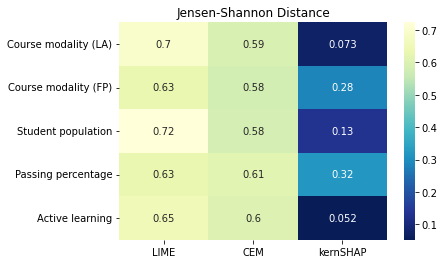

In [54]:
JS_summ_df.index = ['Course modality (LA)', 'Course modality (FP)', 'Student population', 
                    'Passing percentage', 'Active learning']
sns.heatmap(JS_summ_df.astype('float'), annot=True, cmap="YlGnBu_r")
plt.title('Jensen-Shannon Distance')
plt.savefig("./uniform_eq_results/compare_results/JS_summ.png", bbox_inches = 'tight')
plt.show()

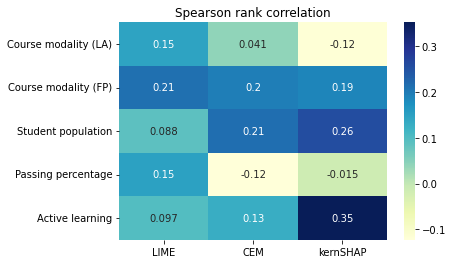

In [53]:
Rcor_summ_df.index = ['Course modality (LA)', 'Course modality (FP)', 'Student population', 
                    'Passing percentage', 'Active learning']
sns.heatmap(Rcor_summ_df.astype('float'), annot=True, cmap="YlGnBu")
plt.title('Spearson rank correlation')
plt.savefig("./uniform_eq_results/compare_results/Rcor_summ.png", bbox_inches = 'tight')
plt.show()

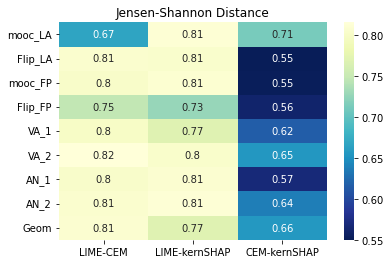

In [62]:
sns.heatmap(JS_in_summ_df.astype('float'), annot=True, cmap="YlGnBu_r")
plt.title('Jensen-Shannon Distance')
plt.savefig("./uniform_eq_results/compare_results/JS_in_summ.png", bbox_inches = 'tight')
plt.show()

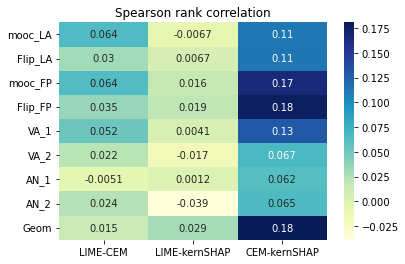

In [63]:
sns.heatmap(Rcor_in_summ_df.astype('float'), annot=True, cmap="YlGnBu")
plt.title('Spearson rank correlation')
plt.savefig("./uniform_eq_results/compare_results/Rcor_in_summ.png", bbox_inches = 'tight')
plt.show()

### Get active learning info

In [9]:
import pandas as pd
import numpy as np

path = '/Volumes/MOOC/data/course/flip/courseware/schedule/'
flipped_LA_sch_2018 = pd.read_csv(path+'EPFL-AlgebreLineaire-2018.csv')
flipped_LA_sch_2018['year'] = 2018
flipped_LA_sch_2019 = pd.read_csv(path+'EPFL-AlgebreLineaire-2019.csv')
flipped_LA_sch_2019['year'] = 2019
flipped_FP_sch = pd.read_csv(path+'EPFL-CS-210-2018_t3.csv')
flipped_LA_sch = pd.concat([flipped_LA_sch_2018, flipped_LA_sch_2019])

In [11]:
flipped_FP_sch.head()

,id,type,chapter,subchapter,date,duration,grade_max
0,425d356a6f4841cb9b84cad3066eab19,video,1,1.1,2018-09-19,873,NaN
1,a75d12e7a2194dba9fc50ccb7359e44f,video,1,1.2,2018-09-19,866,NaN
2,0e66b3327b8140af85cfa05facc6156d,video,1,1.3,2018-09-19,263,NaN
3,a423992c2ef44939998d284095802105,video,1,1.4,2018-09-19,530,NaN
4,eb11632f98604d69a6ee09c8204c59dd,video,1,1.5,2018-09-19,686,NaN


In [22]:
info_ = flipped_LA_sch.groupby(by=['type', 'chapter', 'year'], as_index=False).count()
info_['week'] = info_['chapter'].astype(str) + '-'+ info_['year'].astype(str)
info_ = info_[['type', 'week', 'id']]
info_ = info_.pivot(index='week', columns='type', values='id')
info_ = info_.fillna(0)
info_['active_learning'] = info_['problem'] / info_['video']
info_

type,problem,video,active_learning
week,,,
0-2019,0.0,1.0,0.000000
1-2019,20.0,8.0,2.500000
10-2018,17.0,6.0,2.833333
10-2019,17.0,6.0,2.833333
2-2019,22.0,10.0,2.200000
3-2018,8.0,7.0,1.142857
3-2019,14.0,7.0,2.000000
4-2018,16.0,10.0,1.600000
4-2019,20.0,14.0,1.428571


In [23]:
info_['active_learning'].mean()

1.7138181993445152

# Other potential codes

In [29]:
# cosine distance
def cosine_vector(m1, m2):
    """
    in:
    m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2

    out:
    list of length n_instances, containing cosine distances
    between feature importance scores for each instance
    """
    dists = []
    for i in range(min(len(m1.columns), len(m2.columns))):
        x,y = extract(m1, m2, i)
        dists.append(cosine(x,y))
    return dists



In [30]:
# norm of differences
def norm_differences(m1, m2):
    """
    in:
    m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2

    out:
    Frobenius norm of the difference of the two dataframes
    """
    return np.linalg.norm(m1-m2, ord='fro')



In [33]:
from sklearn.metrics import mutual_info_score
# mutual information 
def mutual_info(m1, m2):
    """
    in:
    m1, m2: DataFrames of shape (n_instances, n_features)
          containing feature importance scores from method 1/2

    out:
    list of length n_instances, containing mutual info
    between feature importance scores for each instance
    """
    dists = []
    for i in range(min(len(m1.columns), len(m2.columns))):
        x,y = extract(m1, m2, i)
        dists.append(mutual_info_score(x,y))
    dists = np.array(dists)
    return dists
